# Analyzing K-Pop Using Machine Learning (PART II)

[Import Data](https://www.youtube.com/watch?v=xay8amjciHA&t=2s)

## Exploratory Data Analysis

### Import modules

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

### Import data


In [3]:
df = pd.read_csv("cleaned_kpop_data.csv")

## Data cleaned final

### gender_pref

In [4]:
df.gender_pref.value_counts()

i listen to both                       111
yes                                     68
its about the music, not the gender     54
no                                       7
Name: gender_pref, dtype: int64

In [5]:
pref = df['gender_pref']
pref_test = pref

pref_test = pref_test.apply(lambda x: x.lower())

In [6]:
for row in range(0, 240):
    if 'yes' in pref_test.iloc[row]:
        pref_test.iloc[row] = 'male'
    elif "no" in pref_test.iloc[row] and "not" not in pref_test.iloc[row]:
        pref_test.iloc[row] = 'female'
    elif 'music' in pref_test.iloc[row]:
        pref_test.iloc[row] = "it's about music"
    else:
        pref_test.iloc[row] = 'both'

In [7]:
pref_test.value_counts()

both                111
male                 68
it's about music     54
female                7
Name: gender_pref, dtype: int64

In [8]:
df['gender_pref'] = pref_test
df.gender_pref.value_counts()

both                111
male                 68
it's about music     54
female                7
Name: gender_pref, dtype: int64

### reason

In [9]:
df.reason.value_counts()

its different from the usual music. i like something new for a change                                                                                                                                                                                                                                                                                                                                                                             87
its different from the usual music. i like something new for a change;the videos are unique;choreography is unique;the idols are very attractive                                                                                                                                                                                                                                                                                                  40
its different from the usual music. i like something new for a change;the videos are unique;choreography is unique            

In [19]:
reason = df['reason']
reason_test = reason

reason_test = reason_test.apply(lambda x: x.lower())

In [20]:
for row in range(0, 240):
    if "its different from the usual music. i like something new for a change" in reason_test.iloc[row] and ";" not in reason_test.iloc[row]:
        reason_test.iloc[row] = "unique music style"
    elif "idols are very attractive" in reason_test.iloc[row] and ";" not in reason_test.iloc[row]:
        reason_test.iloc[row] = "attractive idols"
    elif ";" in reason_test.iloc[row]:
        reason_test.iloc[row] = "many reasons"
    else:
        reason_test.iloc[row]  = "other reason(s)"   

In [21]:
reason_test.value_counts()

many reasons          106
unique music style     87
other reason(s)        44
attractive idols        3
Name: reason, dtype: int64

In [22]:
df['reason'] = reason_test
df.reason.value_counts()

many reasons          106
unique music style     87
other reason(s)        44
attractive idols        3
Name: reason, dtype: int64

### job

In [23]:
df.job.value_counts()

student                                                                      206
caregiver                                                                      2
none of the above.                                                             1
optometry office lead                                                          1
chef                                                                           1
disney cast member                                                             1
i have job, plain n simple                                                     1
to either be a designer, artist or an animator.                                1
manager                                                                        1
sales                                                                          1
elementary school office worker                                                1
bartender                                                                      1
berklee student             

In [24]:
job = df['job']
job_test = job

job_test = job_test.apply(lambda x: x.lower())

In [25]:
for row in range(0, 240):
    if "no" in job_test.iloc[row] or "unemployed" in job_test.iloc[row] or "don't" in job_test.iloc[row]:
        job_test.iloc[row] = "unemployed"
    elif "student" in job_test.iloc[row]:
        job_test.iloc[row] = "student"
    else:
        job_test.iloc[row] = "full-time worker"

In [26]:
job_test.value_counts()

student             210
full-time worker     27
unemployed            3
Name: job, dtype: int64

In [27]:
df.job = job_test
df.job.value_counts()

student             210
full-time worker     27
unemployed            3
Name: job, dtype: int64

In [28]:
df.head()

,fav_group,popl_by_country,reason,yr_litened,gender_pref,daily_music_hr,watch_MV_yn,daily_MV_hr,obsessed_yn,news_medium,...,money_src,concert_yn,crazy_ev,age,country,job,gender,num_grp_like,bts_vs_others,lf_chg
0,bts,its gaining popularity,unique music style,1.5,it's about music,5.0,yes,2.5,not sure,youtube,...,"others (gift, scholarship, etc)",yes,others,18,uk,full-time worker,female,1,bts,made fun of
1,bts,its gaining popularity,many reasons,3.5,both,3.0,yes,2.5,yes,youtube,...,part-time job,"i want to, but the k-pop groups don't come to ...",others,18,uk,student,female,1,bts,made fun of
2,"bts,monsta x",its gaining popularity,many reasons,4,it's about music,3.0,yes,2.5,no,"social media (twitter, instagram)",...,part-time job,yes,nothing,18,other european countries,student,female,2,bts,made fun of
3,bts,its gaining popularity,unique music style,3.5,both,5.0,yes,3.5,no,youtube,...,part-time job,yes,nothing,24,usa,student,female,1,bts,made fun of
4,bts,yes,unique music style,3.5,male,5.0,yes,2.5,not sure,youtube,...,from parents,"i want to, but the k-pop groups don't come to ...",nothing,18,usa,student,female,1,bts,made fun of


In [40]:
df.yr_litened.value_counts()

3.5                     89
4                       69
1.5                     66
1                        7
6                        2
7 years ago              2
7 years                  1
8+ years ago             1
9 years, since 2010      1
14                       1
9 years coming april     1
Name: yr_litened, dtype: int64

In [41]:
yrs_listen = df['yr_litened'].apply(lambda x: x.split(' ')[0])
yrs_listen.value_counts()

3.5    89
4      69
1.5    66
1       7
7       3
6       2
9       2
8+      1
14      1
Name: yr_litened, dtype: int64

In [47]:
yrs_listen = yrs_listen.apply(lambda x: x.replace("+", ""))
yrs_listen.value_counts()

3.5    89
4      69
1.5    66
1       7
7       3
6       2
9       2
8       1
14      1
Name: yr_litened, dtype: int64

In [48]:
df.yr_litened = yrs_listen
df.yr_litened.value_counts()

3.5    89
4      69
1.5    66
1       7
7       3
6       2
9       2
8       1
14      1
Name: yr_litened, dtype: int64

In [49]:
df.to_csv("final_clean_kpop.csv", index=False)

## EDA

In [50]:
df = pd.read_csv('final_clean_kpop.csv')

In [51]:
df.shape

(240, 25)

In [52]:
df.head()

,fav_group,popl_by_country,reason,yr_litened,gender_pref,daily_music_hr,watch_MV_yn,daily_MV_hr,obsessed_yn,news_medium,...,money_src,concert_yn,crazy_ev,age,country,job,gender,num_grp_like,bts_vs_others,lf_chg
0,bts,its gaining popularity,unique music style,1.5,it's about music,5.0,yes,2.5,not sure,youtube,...,"others (gift, scholarship, etc)",yes,others,18,uk,full-time worker,female,1,bts,made fun of
1,bts,its gaining popularity,many reasons,3.5,both,3.0,yes,2.5,yes,youtube,...,part-time job,"i want to, but the k-pop groups don't come to ...",others,18,uk,student,female,1,bts,made fun of
2,"bts,monsta x",its gaining popularity,many reasons,4.0,it's about music,3.0,yes,2.5,no,"social media (twitter, instagram)",...,part-time job,yes,nothing,18,other european countries,student,female,2,bts,made fun of
3,bts,its gaining popularity,unique music style,3.5,both,5.0,yes,3.5,no,youtube,...,part-time job,yes,nothing,24,usa,student,female,1,bts,made fun of
4,bts,yes,unique music style,3.5,male,5.0,yes,2.5,not sure,youtube,...,from parents,"i want to, but the k-pop groups don't come to ...",nothing,18,usa,student,female,1,bts,made fun of


In [53]:
df.describe()

,yr_litened,daily_music_hr,daily_MV_hr,yr_merch_spent,age,num_grp_like
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,3.193750,4.368750,1.954167,85.895833,18.212500,2.033333
std,1.506944,2.146434,1.054966,118.231076,3.488272,2.968265
min,1.000000,0.500000,1.000000,0.000000,12.000000,1.000000
25%,1.500000,3.000000,1.000000,50.000000,18.000000,1.000000
50%,3.500000,5.000000,2.500000,50.000000,18.000000,1.000000
75%,4.000000,5.000000,2.500000,75.000000,18.000000,2.000000
max,14.000000,10.000000,4.500000,500.000000,29.000000,37.000000


In [56]:
df_cont = df[['yr_litened', 'daily_music_hr', 'daily_MV_hr', 'yr_merch_spent', 'age', 'num_grp_like']]

<AxesSubplot:>

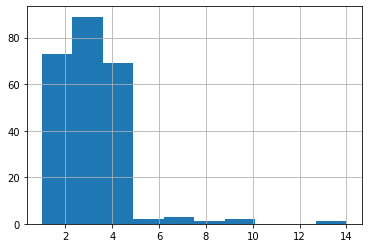

In [57]:
df.yr_litened.hist()

<AxesSubplot:>

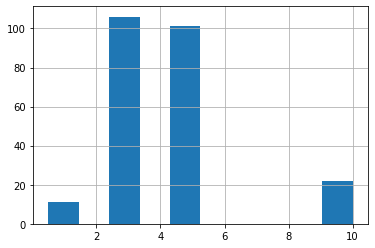

In [58]:
df.daily_music_hr.hist()

<AxesSubplot:>

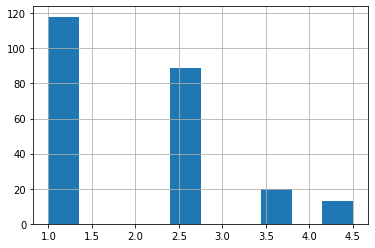

In [59]:
df.daily_MV_hr.hist()

<AxesSubplot:>

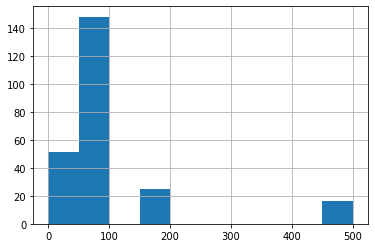

In [60]:
df.yr_merch_spent.hist()

<AxesSubplot:>

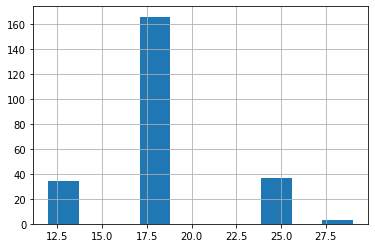

In [61]:
df.age.hist()

<AxesSubplot:>

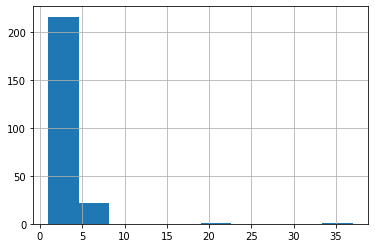

In [62]:
df.num_grp_like.hist()

<AxesSubplot:>

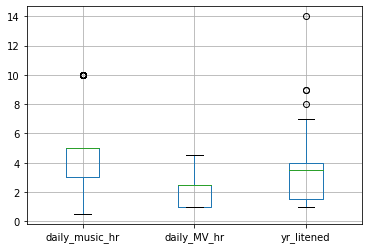

In [63]:
df.boxplot(column=['daily_music_hr', 'daily_MV_hr', 'yr_litened'])

<AxesSubplot:>

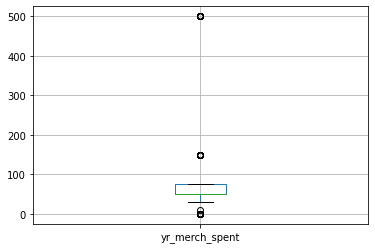

In [64]:
df.boxplot('yr_merch_spent')

<AxesSubplot:>

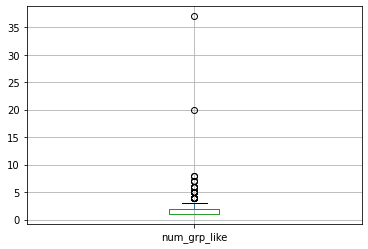

In [66]:
df.boxplot('num_grp_like')

### Removing outliers and check the distributions again

<AxesSubplot:>

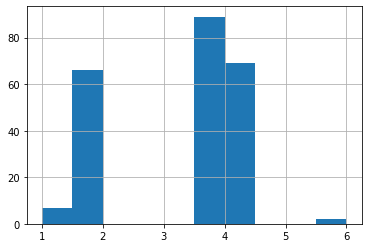

In [67]:
df_yr_listen_no_outlier = df[df.yr_litened < 7]
df_yr_listen_no_outlier.yr_litened.hist()

<AxesSubplot:>

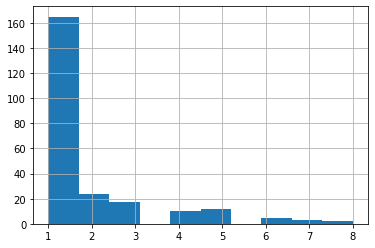

In [68]:
df_num_grp_no_outlier = df[df.num_grp_like < 10]
df_num_grp_no_outlier.num_grp_like.hist()

### Checking correlation among continuous variables

In [71]:
df_corr = df[['yr_litened', 'daily_music_hr', 'daily_MV_hr', 'yr_merch_spent', 'age', 'num_grp_like']].corr()
df_corr

,yr_litened,daily_music_hr,daily_MV_hr,yr_merch_spent,age,num_grp_like
yr_litened,1.000000,0.119141,0.018111,0.161473,0.121877,0.056078
daily_music_hr,0.119141,1.000000,0.152544,0.221685,-0.080921,0.191467
daily_MV_hr,0.018111,0.152544,1.000000,0.093754,-0.121273,0.160830
yr_merch_spent,0.161473,0.221685,0.093754,1.000000,0.010443,-0.009862
age,0.121877,-0.080921,-0.121273,0.010443,1.000000,0.017498
num_grp_like,0.056078,0.191467,0.160830,-0.009862,0.017498,1.000000


<AxesSubplot:>

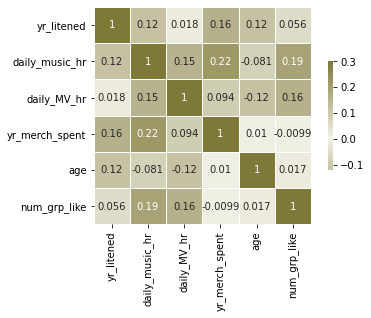

In [73]:
cmap = sns.diverging_palette(800,800, as_cmap=True)
sns.heatmap(df_corr, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5}, annot=True)

## Analyze Categorical Variables

In [76]:
df.drop('lf_chg', axis=1, inplace=True)

In [77]:
df.columns

Index(['fav_group', 'popl_by_country', 'reason', 'yr_litened', 'gender_pref',
       'daily_music_hr', 'watch_MV_yn', 'daily_MV_hr', 'obsessed_yn',
       'news_medium', 'pursuit', 'time_cons_yn', 'life_chg', 'pos_eff',
       'yr_merch_spent', 'money_src', 'concert_yn', 'crazy_ev', 'age',
       'country', 'job', 'gender', 'num_grp_like', 'bts_vs_others'],
      dtype='object')

In [78]:
df_cat = df[['fav_group', 'popl_by_country', 'reason', 'gender_pref',
       'watch_MV_yn', 'obsessed_yn', 'news_medium', 'pursuit', 
       'time_cons_yn', 'life_chg', 'pos_eff', 'money_src', 'concert_yn', 
       'crazy_ev', 'country', 'job', 'gender', 'bts_vs_others']]

graph for fav_group: total = 15


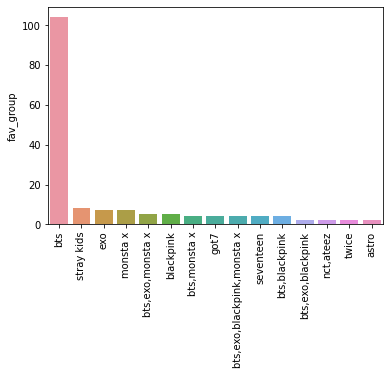

graph for popl_by_country: total = 4


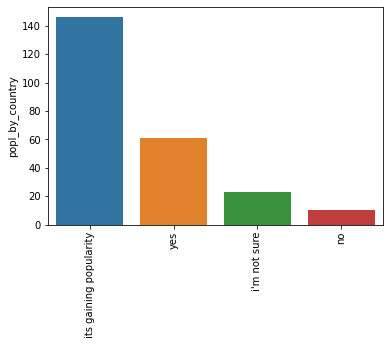

graph for reason: total = 4


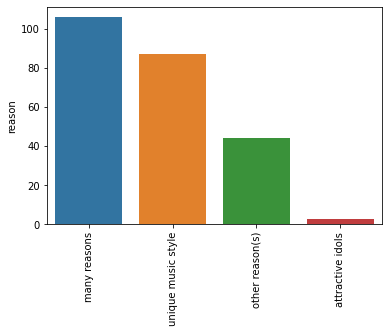

graph for gender_pref: total = 4


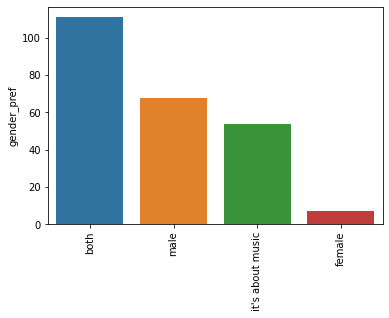

graph for watch_MV_yn: total = 2


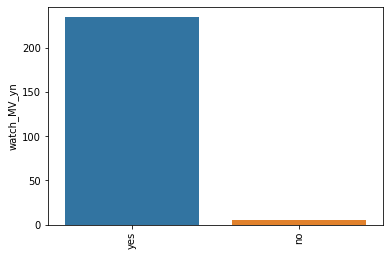

graph for obsessed_yn: total = 3


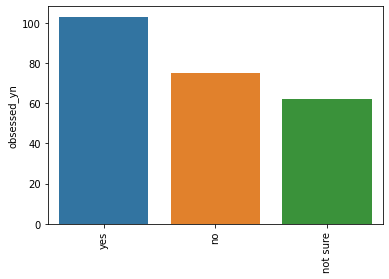

graph for news_medium: total = 3


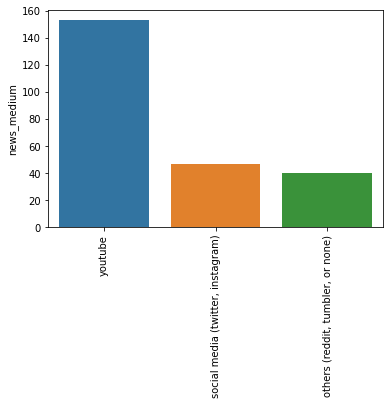

graph for pursuit: total = 6


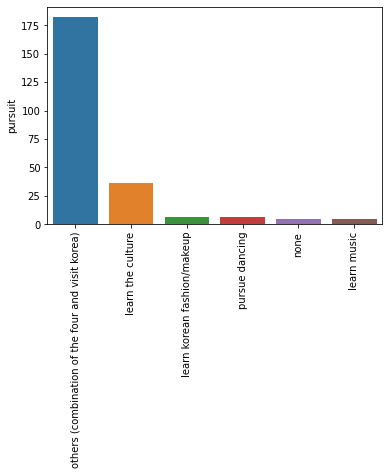

graph for time_cons_yn: total = 3


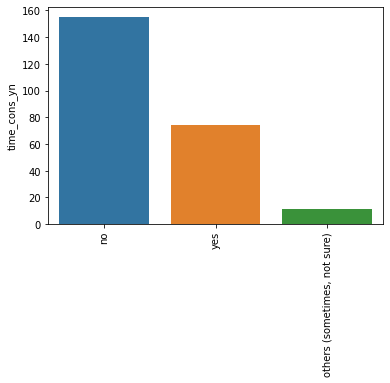

graph for life_chg: total = 15


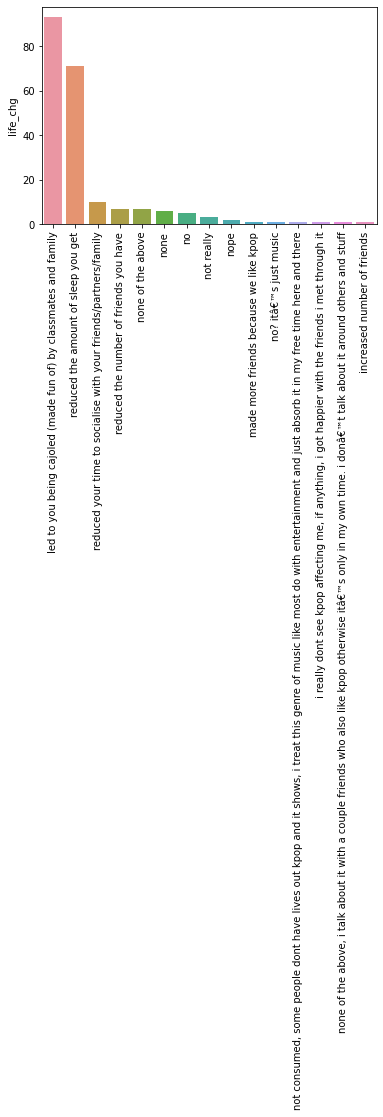

graph for pos_eff: total = 15


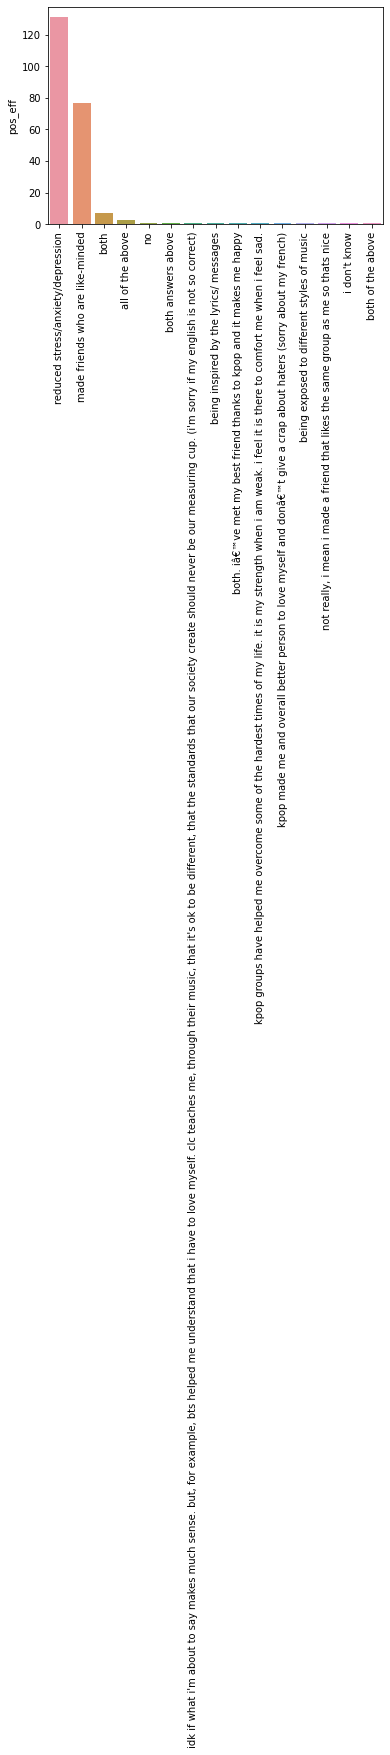

graph for money_src: total = 3


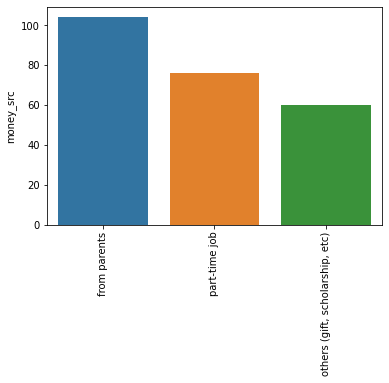

graph for concert_yn: total = 3


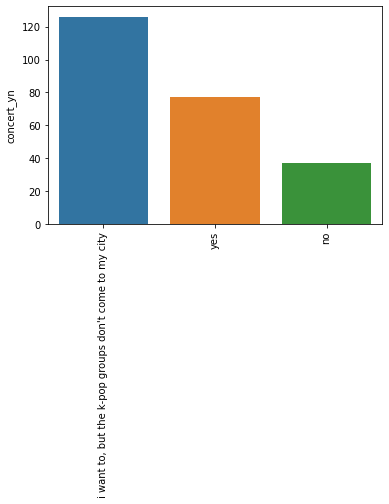

graph for crazy_ev: total = 3


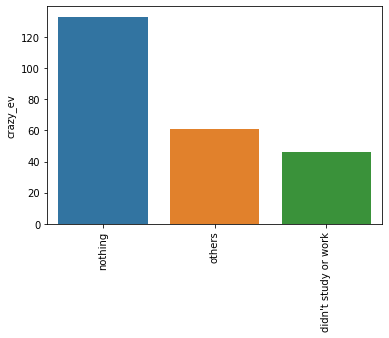

graph for country: total = 10


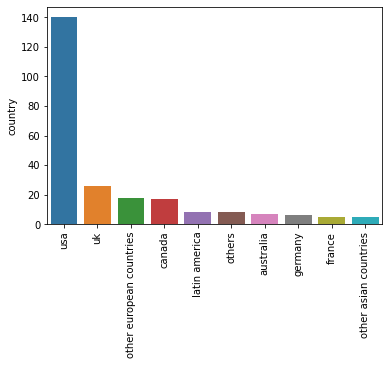

graph for job: total = 3


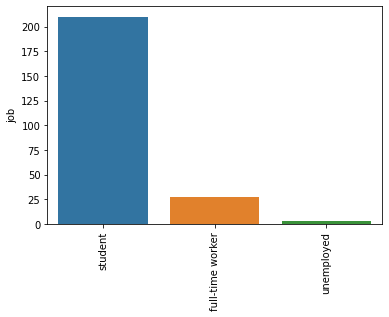

graph for gender: total = 3


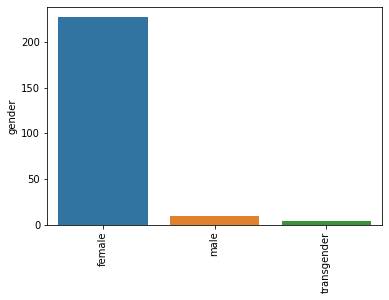

graph for bts_vs_others: total = 2


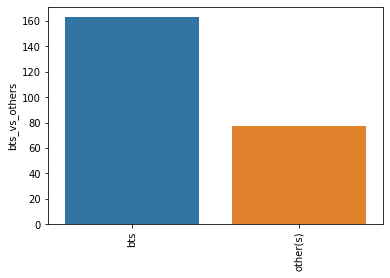

In [79]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()[:15]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

## Fix Data Clean

In [80]:
df.pos_eff.value_counts()

reduced stress/anxiety/depression                                                                                                                                                                                                                                                                                     131
made friends who are like-minded                                                                                                                                                                                                                                                                                       77
both                                                                                                                                                                                                                                                                                                                    7
all of the above                                          

In [81]:
pos_ef = df['pos_eff']
pos_ef_test = pos_ef

pos_ef_test = pos_ef_test.apply(lambda x: x.lower())

for row in range(0, 240):
    if 'reduced stress' in pos_ef_test.iloc[row]:
        pos_ef_test.iloc[row] = 'reduced stress/anxiety/depression'
    elif 'like-minded' in pos_ef_test.iloc[row]:
        pos_ef_test.iloc[row] = 'made friends'
    elif 'both' in pos_ef_test.iloc[row]:
        pos_ef_test.iloc[row] = 'both reduced stress and made friends'
    else:
        pos_ef_test.iloc[row] = "others (don't know, no effect, learning new things)"

pos_ef_test.value_counts()

reduced stress/anxiety/depression                      132
made friends                                            77
others (don't know, no effect, learning new things)     21
both reduced stress and made friends                    10
Name: pos_eff, dtype: int64

In [82]:
df.pos_eff = pos_ef_test

In [83]:
df['life_chg'].value_counts()

led to you being cajoled (made fun of) by classmates and family                                                                                                                   93
reduced the amount of sleep you get                                                                                                                                               71
reduced your time to socialise with your friends/partners/family                                                                                                                  10
reduced the number of friends you have                                                                                                                                             7
none of the above                                                                                                                                                                  7
none                                                                                           

In [84]:
lf_chg = df['life_chg']
lf_chg_test = lf_chg

lf_chg_test = lf_chg_test.apply(lambda x: x.lower())

for row in range(0, 240):
    if 'cajoled' in lf_chg_test.iloc[row]:
        lf_chg_test.iloc[row] = 'made fun of'
    elif 'amount of sleep' in lf_chg_test.iloc[row]:
        lf_chg_test.iloc[row] = 'reduced amount of sleep'
    elif 'friends' and 'friends' in lf_chg_test.iloc[row]:
        lf_chg_test.iloc[row] = 'reduced time of socialized with friends/family'
    elif 'no' in lf_chg_test.iloc[row]:
        lf_chg_test.iloc[row] = 'none'
    else:
        lf_chg_test.iloc[row] = 'others (combination of the negatives, small criticism)'

lf_chg_test.value_counts()

made fun of                                               93
reduced amount of sleep                                   72
none                                                      38
reduced time of socialized with friends/family            26
others (combination of the negatives, small criticism)    11
Name: life_chg, dtype: int64

In [85]:
df.life_chg = lf_chg_test
df.life_chg.value_counts()

made fun of                                               93
reduced amount of sleep                                   72
none                                                      38
reduced time of socialized with friends/family            26
others (combination of the negatives, small criticism)    11
Name: life_chg, dtype: int64

In [86]:
df.to_csv("fix_final_clean_kpop.csv", index=False)

## Back to EDA Again

In [92]:
df_cat = df[['fav_group', 'popl_by_country', 'reason', 'gender_pref',
       'watch_MV_yn', 'obsessed_yn', 'news_medium', 'pursuit', 
       'time_cons_yn', 'life_chg', 'pos_eff', 'money_src', 'concert_yn', 
       'crazy_ev', 'country', 'job', 'gender', 'bts_vs_others']]

graph for fav_group: total = 15


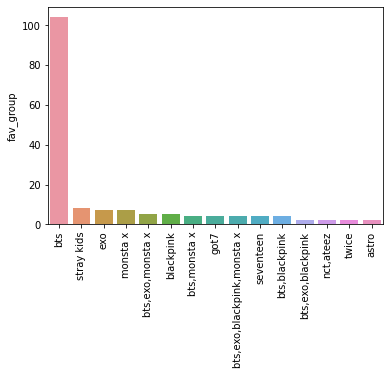

graph for popl_by_country: total = 4


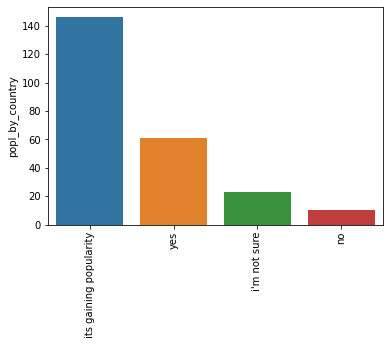

graph for reason: total = 4


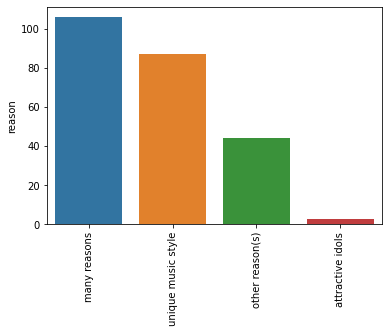

graph for gender_pref: total = 4


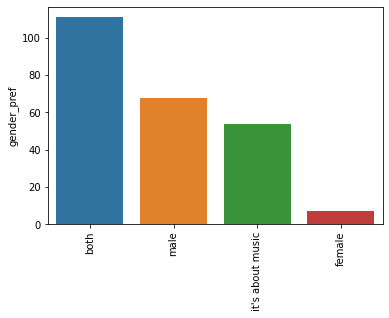

graph for watch_MV_yn: total = 2


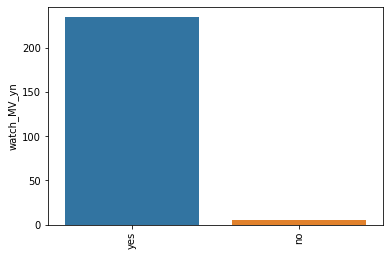

graph for obsessed_yn: total = 3


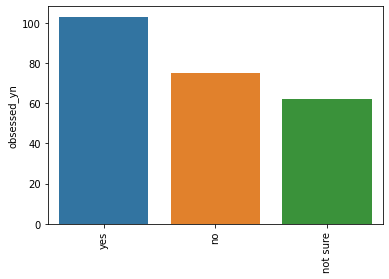

graph for news_medium: total = 3


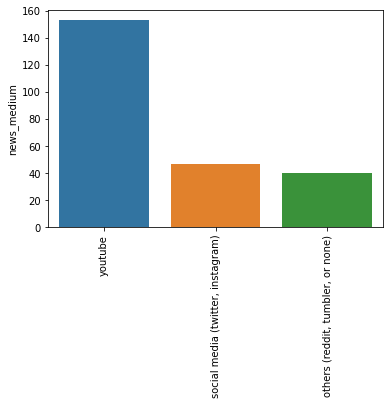

graph for pursuit: total = 6


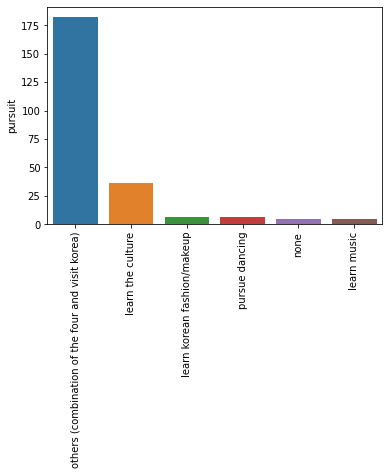

graph for time_cons_yn: total = 3


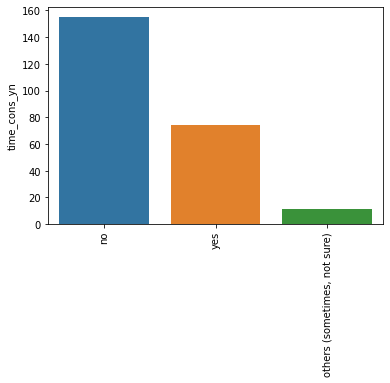

graph for life_chg: total = 5


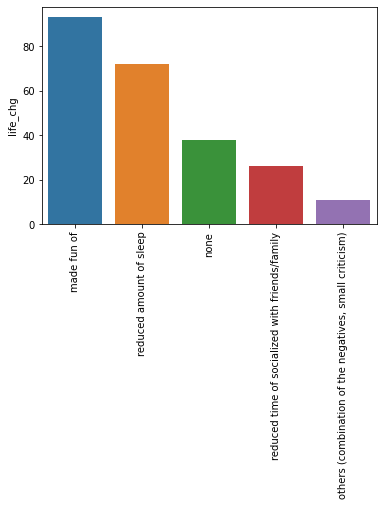

graph for pos_eff: total = 4


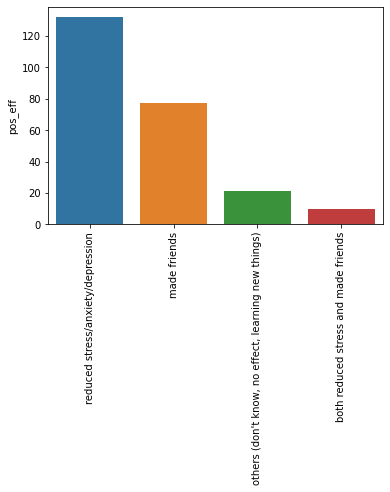

graph for money_src: total = 3


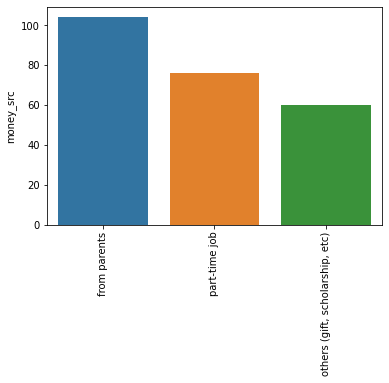

graph for concert_yn: total = 3


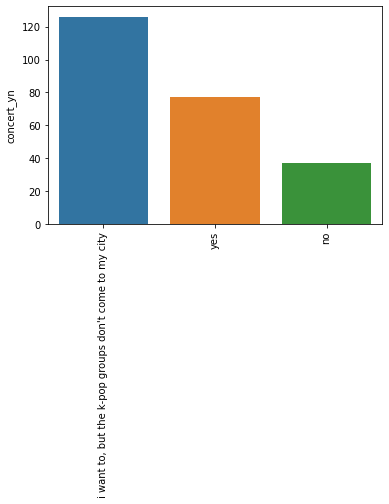

graph for crazy_ev: total = 3


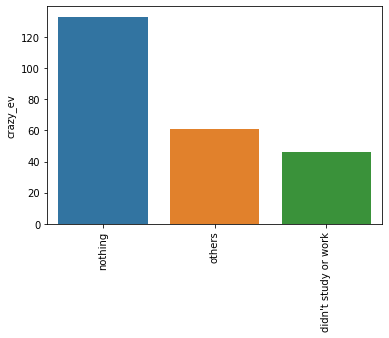

graph for country: total = 10


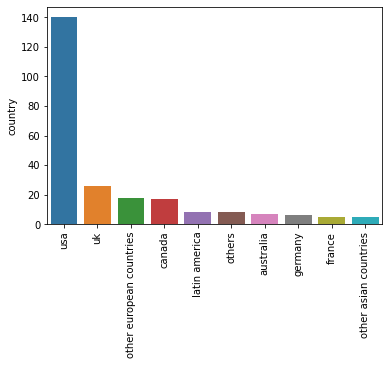

graph for job: total = 3


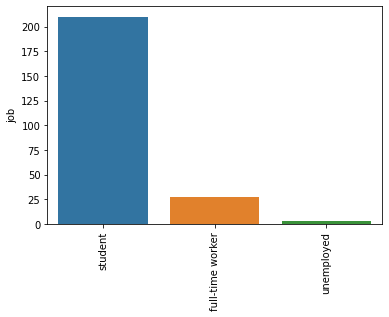

graph for gender: total = 3


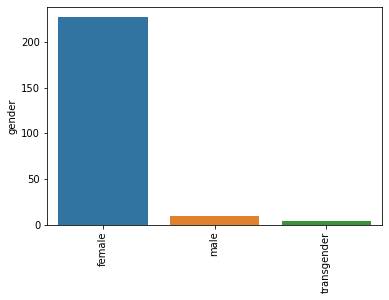

graph for bts_vs_others: total = 2


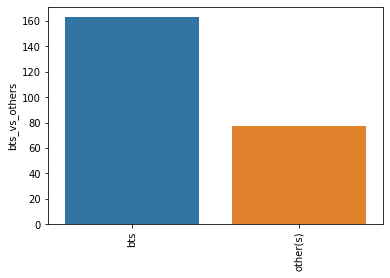

In [93]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()[:15]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

## Pivot Tables

In [94]:
df.columns

Index(['fav_group', 'popl_by_country', 'reason', 'yr_litened', 'gender_pref',
       'daily_music_hr', 'watch_MV_yn', 'daily_MV_hr', 'obsessed_yn',
       'news_medium', 'pursuit', 'time_cons_yn', 'life_chg', 'pos_eff',
       'yr_merch_spent', 'money_src', 'concert_yn', 'crazy_ev', 'age',
       'country', 'job', 'gender', 'num_grp_like', 'bts_vs_others'],
      dtype='object')

### Relationship between listening/watching kpop and positive efferct

In [98]:
pd.pivot_table(df, index= 'pos_eff', 
                values=['daily_MV_hr', 'daily_music_hr']).sort_values('daily_MV_hr', ascending=False)

,daily_MV_hr,daily_music_hr
pos_eff,,
both reduced stress and made friends,2.650000,4.650000
reduced stress/anxiety/depression,1.988636,4.473485
made friends,1.837662,4.012987
"others (don't know, no effect, learning new things)",1.833333,4.880952


### Relationship between listening and obsession

In [99]:
pd.pivot_table(df, index='obsessed_yn',
               values=['daily_MV_hr', "daily_music_hr"]).sort_values('daily_music_hr', ascending=False)

,daily_MV_hr,daily_music_hr
obsessed_yn,,
yes,2.087379,4.762136
not sure,2.201613,4.080645
no,1.566667,4.066667


### Relationship going to concert and buy merchandise

In [100]:
pd.pivot_table(df, index='concert_yn', values='yr_merch_spent')

,yr_merch_spent
concert_yn,
"i want to, but the k-pop groups don't come to my city",66.388889
no,53.378378
yes,133.441558


In [101]:
df.columns

Index(['fav_group', 'popl_by_country', 'reason', 'yr_litened', 'gender_pref',
       'daily_music_hr', 'watch_MV_yn', 'daily_MV_hr', 'obsessed_yn',
       'news_medium', 'pursuit', 'time_cons_yn', 'life_chg', 'pos_eff',
       'yr_merch_spent', 'money_src', 'concert_yn', 'crazy_ev', 'age',
       'country', 'job', 'gender', 'num_grp_like', 'bts_vs_others'],
      dtype='object')

In [106]:
df_columns =df[['fav_group', 'popl_by_country', 'reason', 'yr_litened', 'gender_pref',
       'watch_MV_yn', 'daily_MV_hr', 'obsessed_yn',
       'news_medium', 'pursuit', 'time_cons_yn', 'life_chg', 'pos_eff',
       'yr_merch_spent', 'money_src', 'concert_yn', 'crazy_ev', 
       'country', 'job', 'gender', 'num_grp_like', 'bts_vs_others', 'age', 'daily_music_hr']]

In [107]:
for i in df_columns.columns:
    print(i)
    print(pd.pivot_table(df_columns, index=i, values='daily_music_hr').sort_values('daily_music_hr', ascending=False))

fav_group
                                                    daily_music_hr
fav_group                                                         
wanna one                                                    10.00
bts,blackpink,stray kids,got7                                10.00
bts,exo,monsta x,shinee, red velvet, mamamoo, t...           10.00
bts,exo,monsta x,ateez, nct, got7 too many to c...           10.00
bts,exo,blackpink,monsta x,shinee,a.c.e                      10.00
...                                                            ...
bts,exo,blackpink,monsta x,i'm open to enjoying...            3.00
bts,the black skirts                                          3.00
bts,loona                                                     3.00
twice                                                         1.75
seventeen, twice                                              0.50

[86 rows x 1 columns]
popl_by_country
                        daily_music_hr
popl_by_country                       
ye

ValueError: Grouper for 'daily_music_hr' not 1-dimensional

### Relationship age and positive effects & life changer

In [109]:
pd.pivot_table(df_columns, index='pos_eff', columns='life_chg', values='age')

life_chg,made fun of,none,"others (combination of the negatives, small criticism)",reduced amount of sleep,reduced time of socialized with friends/family
pos_eff,,,,,
both reduced stress and made friends,24.000000,16.000000,18.0,19.200000,NaN
made friends,17.454545,19.090909,18.0,17.666667,19.090909
"others (don't know, no effect, learning new things)",18.857143,20.000000,12.0,19.500000,21.000000
reduced stress/anxiety/depression,18.326923,18.277778,18.0,18.244444,17.538462


In [110]:
pd.pivot_table(df_columns, index='concert_yn', columns='bts_vs_others', values='yr_merch_spent')

bts_vs_others,bts,other(s)
concert_yn,,
"i want to, but the k-pop groups don't come to my city",72.848837,52.500000
no,47.115385,68.181818
yes,109.803922,179.807692


In [111]:
pd.pivot_table(df_columns, index=['concert_yn', 'bts_vs_others'], columns='country', values='yr_merch_spent')

country                                                            australia  \
concert_yn                                         bts_vs_others               
i want to, but the k-pop groups don't come to m... bts             58.333333   
                                                   other(s)        41.666667   
no                                                 bts            500.000000   
                                                   other(s)              NaN   
yes                                                bts                   NaN   
                                                   other(s)              NaN   

country                                                               canada  \
concert_yn                                         bts_vs_others               
i want to, but the k-pop groups don't come to m... bts            116.666667   
                                                   other(s)       150.000000   
no                                                 bts                   NaN   
                                                   other(s)              NaN   
yes                                                bts            200.000000   
                                                   other(s)       383.333333   

country                                                           france  \
concert_yn                                         bts_vs_others           
i want to, but the k-pop groups don't come to m... bts              50.0   
                                                   other(s)          NaN   
no                                                 bts              25.0   
                                                   other(s)          NaN   
yes                                                bts              62.5   
                                                   other(s)          NaN   

country                                                             germany  \
concert_yn                                         bts_vs_others              
i want to, but the k-pop groups don't come to m... bts            76.666667   
                                                   other(s)       66.666667   
no                                                 bts                  NaN   
                                                   other(s)             NaN   
yes                                                bts                  NaN   
                                                   other(s)             NaN   

country                                                           latin america  \
concert_yn                                         bts_vs_others                  
i want to, but the k-pop groups don't come to m... bts                    127.0   
                                                   other(s)                25.0   
no                                                 bts                      NaN   
                                                   other(s)                 NaN   
yes                                                bts                      NaN   
                                                   other(s)               150.0   

country                                                           other asian countries  \
concert_yn                                         bts_vs_others                          
i want to, but the k-pop groups don't come to m... bts                              0.0   
                                                   other(s)                         NaN   
no                                                 bts                             50.0   
                                                   other(s)                        50.0   
yes                                                bts                             75.0   
                                                   other(s)                         NaN   

country                                                           other european c